### import packages

In [1]:
import os
from osgeo import gdal
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rasterio

#### Devide images in 64 x 64 pixels patches

>- load packeges

In [3]:
import rasterio
import numpy as np
import os
import matplotlib.pyplot as plt
from pathlib import Path

>- Define operation functions

In [3]:
def load_geotiff(image_path):
    """Load a multispectral GeoTIFF image using rasterio."""
    with rasterio.open(image_path) as src:
        image = src.read()  # Reads all bands into a NumPy array
        profile = src.profile  # Save profile for GeoTIFF metadata
    return image, profile

In [4]:
def extract_patches(image, patch_size=64):
    """Divide a multispectral image into non-overlapping patches."""
    bands, h, w = image.shape  # Get bands, height, and width
    patches = []

    for i in range(0, h, patch_size):
        for j in range(0, w, patch_size):
            if i + patch_size <= h and j + patch_size <= w:  # Ensure patch fits
                patch = image[:, i:i+patch_size, j:j+patch_size]  # Extract patch
                patches.append(patch)
    
    return patches

In [5]:
def save_patches(patches, profile, output_dir="patches"):
    """Save extracted patches as separate GeoTIFF files."""
    os.makedirs(output_dir, exist_ok=True)

    for idx, patch in enumerate(patches):
        patch_filename = os.path.join(output_dir, f"patch_{idx}.tif")
        
        # Update profile for new patch size
        patch_profile = profile.copy()
        patch_profile.update({
            "height": patch.shape[1],
            "width": patch.shape[2],
            "count": patch.shape[0]
        })

        # Save patch as GeoTIFF
        with rasterio.open(patch_filename, "w", **patch_profile) as dst:
            dst.write(patch)

In [6]:
def visualize_patches(patches, num_patches_to_show=5):
    """Display random patches."""
    fig, axes = plt.subplots(1, num_patches_to_show, figsize=(15, 5))

    for ax in axes:
        idx = np.random.randint(0, len(patches))  # Pick random patch
        patch = patches[idx]
        
        # Convert to grayscale for visualization (show only the first band)
        patch_display = patch[0, :, :] if patch.shape[0] > 1 else patch.squeeze()
        
        ax.imshow(patch_display, cmap="gray")
        ax.axis("off")

    plt.show()

In [7]:
def main(image_path, save_dir):
    """Main function to process a GeoTIFF image."""
    image, profile = load_geotiff(image_path)
    patches = extract_patches(image)
    save_patches(patches, profile, output_dir=save_dir)
    visualize_patches(patches)

>- Load the multispectral image

In [8]:
img_path = Path('../../temp/odm_orthophoto/odm_orthophoto.tif')
if not img_path.exists():
    raise FileNotFoundError(f"Image file not found: {img_path}")
output_base = Path('../../data/new_odm_patches/')
output_base.mkdir(parents=True, exist_ok=True)

>- Create Patches
>>- germination

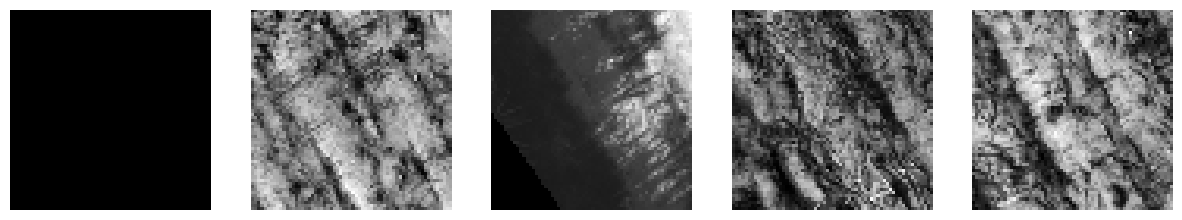

In [9]:
output_dir = Path(os.path.join(output_base, 'test001/patches'))
main(img_path,output_dir)


In [2]:
def visualize_patch_from_file(patch_path):
    """Read and visualize a saved GeoTIFF patch from file."""
    with rasterio.open(patch_path) as src:
        patch = src.read()  # Shape: (bands, height, width)

    # Show the first band as grayscale
    patch_display = patch[0, :, :] if patch.shape[0] > 1 else patch.squeeze()

    plt.figure(figsize=(5, 5))
    plt.imshow(patch_display, cmap='gray')
    plt.axis('off')
    plt.title(f"Patch: {patch_path}")
    plt.show()


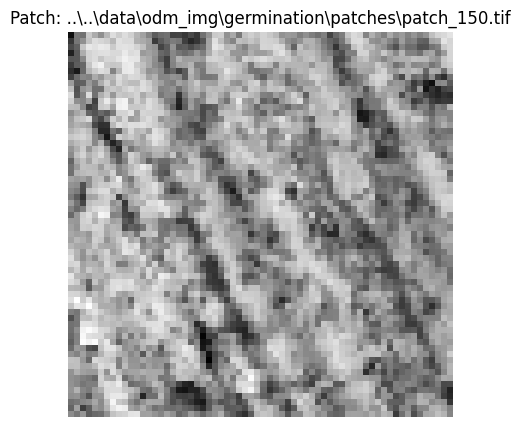

In [6]:
img_path = Path('../../data/odm_img/germination/patches/patch_150.tif')
visualize_patch_from_file(img_path)

In [7]:
# visualize the 10 set of patches using file path
def visualize_multiple_patches(patch_dir, num_patches=10):
    """Visualize multiple patches from a directory."""
    patch_files = list(Path(patch_dir).glob("patch_*.tif"))
    selected_files = np.random.choice(patch_files, size=min(num_patches, len(patch_files)), replace=False)

    fig, axes = plt.subplots(1, len(selected_files), figsize=(15, 5))

    for ax, patch_file in zip(axes, selected_files):
        with rasterio.open(patch_file) as src:
            patch = src.read()
        
        patch_display = patch[0, :, :] if patch.shape[0] > 1 else patch.squeeze()
        ax.imshow(patch_display, cmap='gray')
        ax.axis('off')
        ax.set_title(f"{patch_file.name}")

    plt.show()

In [9]:
#define file path
germaination_dir = Path('../../data/odm_img/germination/patches/')
grand_growth_dir = Path('../../data/odm_img/grand_growth/patches/')
ripening_dir = Path('../../data/odm_img/ripening/patches/')
tillering_dir = Path('../../data/odm_img/tillering/patches/')


>- germination

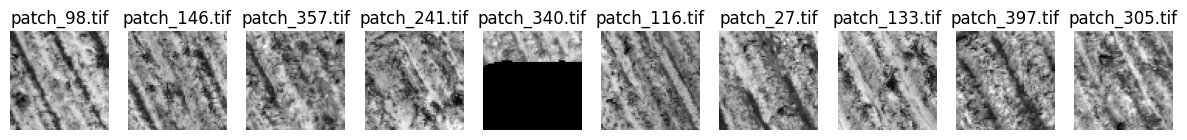

In [10]:
visualize_multiple_patches(germaination_dir)

>- tillering

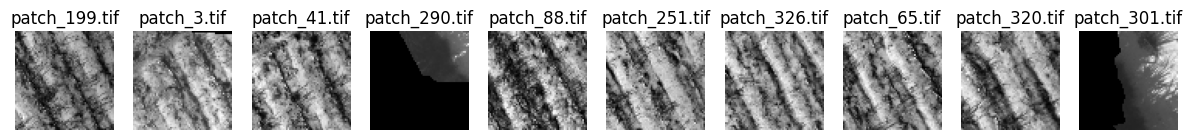

In [11]:
visualize_multiple_patches(tillering_dir)

>- grand growth

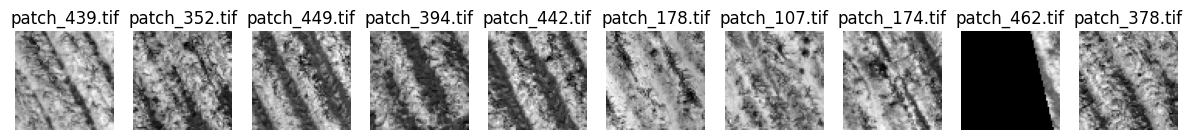

In [12]:
visualize_multiple_patches(germaination_dir)

>- ripening

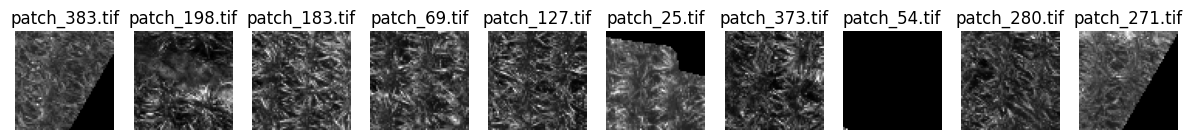

In [13]:
visualize_multiple_patches(ripening_dir)